In [40]:
import json
with open('group_compression_tests.json', 'r', encoding='utf8') as jfile:
    data = json.load(jfile)

In [44]:
uncompressed_dict = {}

for filetype in data.keys():
    if data[filetype].get('infer'):
        key = 'infer'
    elif data[filetype].get('none'):
        key = 'none'
    else:
        key = 'uncompressed'

    uncompressed_dict[filetype] = data[filetype][key]


zstd_dict = {filetype: data[filetype]['zstd'] for filetype in data.keys()}

_zstd_values = np.array([tests['mean_read_time'] for _, tests in zstd_dict.items()])
_uncompressed_values = np.array([tests['mean_read_time'] for _, tests in uncompressed_dict.items()])

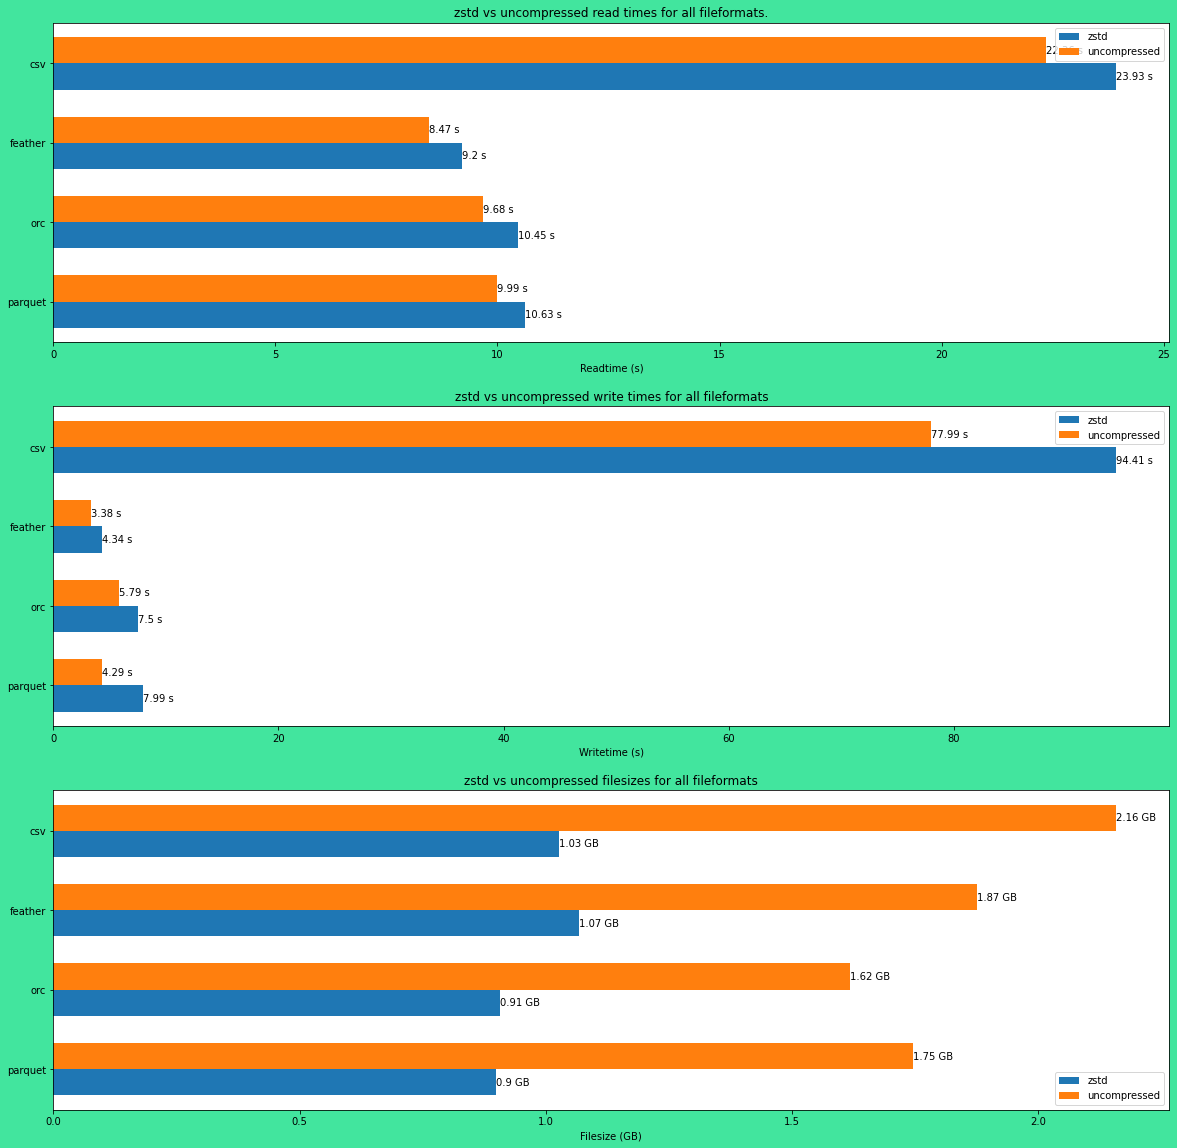

In [43]:
import matplotlib.pyplot as plt
import numpy as np
titles = [
    'zstd vs uncompressed read times for all fileformats.',
    'zstd vs uncompressed write times for all fileformats',
    'zstd vs uncompressed filesizes for all fileformats'
]

suffixes = ['s', 's', 'GB']
x_labels = [
    f'Readtime ({suffixes[0]})',
    f'Writetime ({suffixes[1]})',
    f'Filesize ({suffixes[2]})'
]

data_keys = ['mean_read_time', 'mean_write_time', 'mean_filesize_in_GB']

fig, axs = plt.subplots(3, figsize=(20, 20), facecolor='#42e59e')
filetypes = [filetype for filetype in zstd_dict.keys()]

bar_height = 0.33
y = np.arange(len(filetypes))


for i, key in enumerate(data_keys):
    axs[i].set_title(titles[i])
    axs[i].set_yticks(y, filetypes)
    axs[i].set_xlabel(x_labels[i])

    zstd_values = [tests[key] for _, tests in zstd_dict.items()]
    uncompressed_values = [tests[key] for _, tests in uncompressed_dict.items()]

    zstd_bar = axs[i].barh(
        y - bar_height / 2,
        zstd_values,
        bar_height,
        label='zstd'
    )
    zstd_labels = [f'{n} {suffixes[i]}' for n in np.round(zstd_values, 2)]
    axs[i].bar_label(zstd_bar, zstd_labels)

    uncompressed_bar = axs[i].barh(
        y + bar_height / 2,
        uncompressed_values,
        bar_height,
        label='uncompressed'
    )
    uncompressed_labels = [f'{n} {suffixes[i]}' for n in np.round(uncompressed_values, 2)]
    axs[i].bar_label(uncompressed_bar, uncompressed_labels)

    axs[i].legend()

fig.savefig('graphs/compression/zstd_vs_uncompressed')